In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/movies_FINAL.csv")
df.shape

(4364, 27)

In [ ]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,movie_title,...,language,country,content_rating,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,budget_filled,gross_filled
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,...,English,USA,PG-13,2009.0,936.0,7.9,1.78,33000,237000000.0,7.605058e+08
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,...,English,USA,PG-13,2007.0,5000.0,7.1,2.35,0,300000000.0,3.094042e+08
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,...,English,UK,PG-13,2015.0,393.0,6.8,2.35,85000,245000000.0,2.000742e+08
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,...,English,USA,PG-13,2012.0,23000.0,8.5,2.35,164000,250000000.0,4.481306e+08
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,...,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,245000000.0,2.068224e+09


###**CREAR NUEVA COLUMNA: Aprox_profit y categorizarla + Limpieza**

In [ ]:
#Crear columna de la proporción de la ganancia con respecto a presupuesto
df["ratio_profit"] = (df["gross_filled"] - df["budget_filled"]) / df["budget_filled"]
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,movie_title,...,country,content_rating,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,budget_filled,gross_filled,ratio_profit
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,...,USA,PG-13,2009.0,936.0,7.9,1.78,33000,237000000.0,7.605058e+08,2.208885
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,...,USA,PG-13,2007.0,5000.0,7.1,2.35,0,300000000.0,3.094042e+08,0.031347
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,...,UK,PG-13,2015.0,393.0,6.8,2.35,85000,245000000.0,2.000742e+08,-0.183371
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,...,USA,PG-13,2012.0,23000.0,8.5,2.35,164000,250000000.0,4.481306e+08,0.792523
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,...,NaN,NaN,NaN,12.0,7.1,NaN,0,245000000.0,2.068224e+09,7.441729


In [ ]:
#Categorizar
df["imdb_category"] = np.where( df["imdb_score"] < 6, "Not Good" , np.where(df["imdb_score"] < 7, "Neutral",
                                 "Good" ))
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,movie_title,...,content_rating,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,budget_filled,gross_filled,ratio_profit,imdb_category
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,...,PG-13,2009.0,936.0,7.9,1.78,33000,237000000.0,7.605058e+08,2.208885,Good
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,...,PG-13,2007.0,5000.0,7.1,2.35,0,300000000.0,3.094042e+08,0.031347,Good
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,...,PG-13,2015.0,393.0,6.8,2.35,85000,245000000.0,2.000742e+08,-0.183371,Neutral
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,...,PG-13,2012.0,23000.0,8.5,2.35,164000,250000000.0,4.481306e+08,0.792523,Good
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,...,NaN,NaN,12.0,7.1,NaN,0,245000000.0,2.068224e+09,7.441729,Good


In [ ]:
#ver el porcentaje que representa cada categoría
df_category = df["imdb_category"].value_counts()

lista = []
for i in range(len(df_category)):
  proporcion = df_category[i] / df.shape[0]
  lista.append(round(proporcion*100, 2))

df_category = pd.DataFrame(df_category)
df_category.insert(loc = 1, column = "porcentaje", value = lista)

df_category

,count,porcentaje
imdb_category,,
Neutral,1615,37.01
Good,1569,35.95
Not Good,1180,27.04


In [ ]:
#Conservar las columnas de interés (se considera movie_title para poder imputar la columa country)

df_filtrado = df[["director_facebook_likes","ratio_profit","movie_facebook_likes","genres" ,"num_critic_for_reviews", "movie_title", "duration","country", "content_rating", "imdb_category"]]
df_filtrado.head()

,director_facebook_likes,ratio_profit,movie_facebook_likes,genres,num_critic_for_reviews,movie_title,duration,country,content_rating,imdb_category
0,0.0,2.208885,33000,Action|Adventure|Fantasy|Sci-Fi,723.0,Avatar,178.0,USA,PG-13,Good
1,563.0,0.031347,0,Action|Adventure|Fantasy,302.0,Pirates of the Caribbean: At World's End,169.0,USA,PG-13,Good
2,0.0,-0.183371,85000,Action|Adventure|Thriller,602.0,Spectre,148.0,UK,PG-13,Neutral
3,22000.0,0.792523,164000,Action|Thriller,813.0,The Dark Knight Rises,164.0,USA,PG-13,Good
4,131.0,7.441729,0,Documentary,NaN,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,Good


In [ ]:
#imputar country con los valores de movie_title

df_filtrado[df_filtrado["country"].isnull()]["movie_title"]


,movie_title
4,Star Wars: Episode VII - The Force Awakens ...


In [ ]:
#imputar país con los valores correctos en la fila nula y las que contienen "Official Site" y "New Line"
df_filtrado.loc[df_filtrado["movie_title"].str.contains("Star Wars: Episode VII", case=False), "country"] = "USA"
df_filtrado.loc[df_filtrado["movie_title"].str.contains("Country Strong", case=False), "country"] = "USA"
df_filtrado.loc[df_filtrado["movie_title"].str.contains("10,000 B.C.", case=False), "country"] = "USA"
df_filtrado.loc[df_filtrado["movie_title"].str.contains("Town & Country", case=False), "country"] = "USA"

#agrupar
paises_agrupados = [
    df_filtrado["country"].isin(["USA", "Canada", "Mexico", "Panama", "Bahamas", "Dominican Republic"]),
    df_filtrado["country"].isin(["Peru", "Chile", "Brazil", "Argentina", "Colombia", "Venezuela", "Aruba"]),
    df_filtrado["country"].isin(["UK", "France", "Germany", "Italy", "Spain", "Ireland", "Netherlands",
                        "Belgium", "Switzerland", "Sweden", "Norway", "Denmark", "Poland",
                        "Romania", "Hungary", "Greece", "Finland", "Iceland", "Czech Republic",
                        "Slovakia", "Bulgaria", "Slovenia", "Russia", "Georgia", "Turkey",
                        "West Germany", "Soviet Union"]),
    df_filtrado["country"].isin(["China", "Japan", "India", "South Korea", "Hong Kong", "Thailand",
                        "Cambodia", "Taiwan", "Indonesia", "Philippines", "Pakistan", "Afghanistan",
                        "Iran", "Israel", "United Arab Emirates", "Kyrgyzstan"]),
    df_filtrado["country"].isin(["Australia", "New Zealand"]),
    df_filtrado["country"].isin(["South Africa", "Nigeria", "Egypt", "Libya", "Kenya", "Cameroon"])  ]

continentes = ["North America", "South America", "Europe", "Asia", "Oceania", "Africa"]

df_filtrado.insert(loc=2, column="continent", value= np.select(paises_agrupados, continentes, default= "others" ))

df_filtrado = df_filtrado.drop(columns = ["country", "movie_title"])

df_filtrado["continent"].unique()

array(['North America', 'Europe', 'Oceania', 'Asia', 'South America',
       'Africa'], dtype=object)

In [ ]:
#imputar content_rating

df_filtrado["content_rating"].fillna("Unrated", inplace = True)
df_filtrado["content_rating"] = df_filtrado["content_rating"].replace("Not Rated", "Unrated")

print(df_filtrado["content_rating"].unique())

condiciones = [
    df_filtrado["content_rating"].isin(["G", "PG", "TV-G", "TV-PG", "GP", "Approved", "Passed"]),
    df_filtrado["content_rating"].isin(["PG-13", "TV-14"]),
    df_filtrado["content_rating"].isin(["R", "NC-17", "X", "M", "TV-MA"]),
    df_filtrado["content_rating"].isin(["Unrated"])
]

# Cateogorías a asignar
categorias = ["Family", "Teen", "Adult", "Unrated"]

# Agregar columna agrupada
df_filtrado.insert(loc = 2, column = "CR_grouped", value =  np.select(condiciones, categorias, default = "Other"))

df_filtrado.drop(columns = ["content_rating"], inplace = True)

['PG-13' 'Unrated' 'PG' 'G' 'R' 'TV-14' 'TV-PG' 'TV-MA' 'TV-G' 'Approved'
 'NC-17' 'X' 'GP' 'Passed' 'M']


In [ ]:
df_filtrado.head()

,director_facebook_likes,ratio_profit,CR_grouped,continent,movie_facebook_likes,genres,num_critic_for_reviews,duration,imdb_category
0,0.0,2.208885,Teen,North America,33000,Action|Adventure|Fantasy|Sci-Fi,723.0,178.0,Good
1,563.0,0.031347,Teen,North America,0,Action|Adventure|Fantasy,302.0,169.0,Good
2,0.0,-0.183371,Teen,Europe,85000,Action|Adventure|Thriller,602.0,148.0,Neutral
3,22000.0,0.792523,Teen,North America,164000,Action|Thriller,813.0,164.0,Good
4,131.0,7.441729,Unrated,North America,0,Documentary,NaN,NaN,Good


In [ ]:
#Como ya se tienen las categorías fijas de Continent y CR_grouped, se aplica Onehotencoder antes del split

df_atributos = df_filtrado[["continent", "CR_grouped"]]

codificador = OneHotEncoder(sparse_output = False)
codificador.fit(df_atributos)
df_atributos = codificador.transform(df_atributos)

df_atributos = pd.DataFrame(data = df_atributos, columns = codificador.get_feature_names_out())

df_filtrado = df_filtrado.drop(columns = ["continent", "CR_grouped"])
df_filtrado = pd.concat([df_atributos, df_filtrado], axis = 1)

df_filtrado.head()


,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,CR_grouped_Adult,CR_grouped_Family,CR_grouped_Teen,CR_grouped_Unrated,director_facebook_likes,ratio_profit,movie_facebook_likes,genres,num_critic_for_reviews,duration,imdb_category
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.208885,33000,Action|Adventure|Fantasy|Sci-Fi,723.0,178.0,Good
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,563.0,0.031347,0,Action|Adventure|Fantasy,302.0,169.0,Good
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.183371,85000,Action|Adventure|Thriller,602.0,148.0,Neutral
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,22000.0,0.792523,164000,Action|Thriller,813.0,164.0,Good
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,131.0,7.441729,0,Documentary,NaN,NaN,Good


In [ ]:
#Transformar las filas de genres en listas
df_filtrado["genres"] = df_filtrado["genres"].str.split("|")
df_filtrado["genres"].head()

,genres
0,"[Action, Adventure, Fantasy, Sci-Fi]"
1,"[Action, Adventure, Fantasy]"
2,"[Action, Adventure, Thriller]"
3,"[Action, Thriller]"
4,[Documentary]


###**DIVIDIR EL DATASET: TRAINING, VALIDATION, TEST**

In [ ]:
#división del dataset: 0.70-0.15-0.15

# Extraer t
T_c, t= train_test_split(df_filtrado, test_size=0.15, random_state=42)

# Extraer T, V
V, T = train_test_split(T_c, train_size=0.15/0.85, random_state=42)

print("Tamaño del dataset Training", T.shape)
print("Tamaño del dataset Validation", V.shape)
print("Tamaño del dataset Test", t.shape)


Tamaño del dataset Training (3055, 17)
Tamaño del dataset Validation (654, 17)
Tamaño del dataset Test (655, 17)


1. Imputar los valores de duration

In [ ]:
#Ver cantidad de nulos del dataset de training
T.isnull().sum()

,0
continent_Africa,0
continent_Asia,0
continent_Europe,0
continent_North America,0
continent_Oceania,0
continent_South America,0
CR_grouped_Adult,0
CR_grouped_Family,0
CR_grouped_Teen,0
CR_grouped_Unrated,0


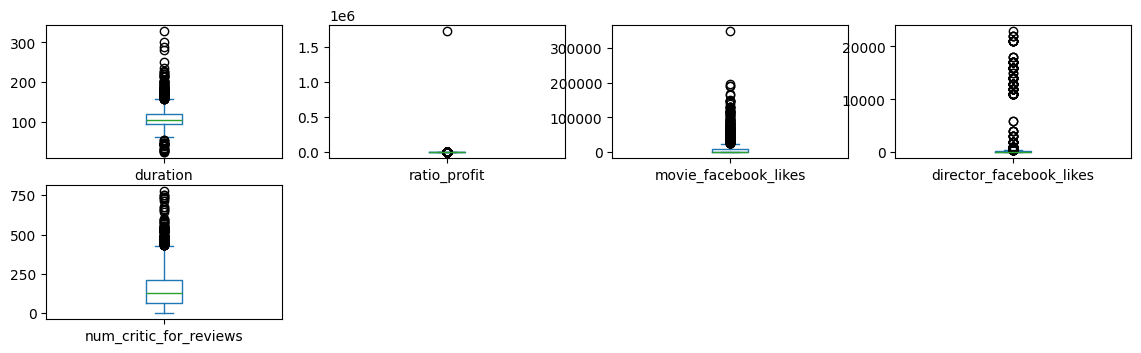

In [172]:
#ver distribución de duration

T[["duration", "ratio_profit", "movie_facebook_likes","director_facebook_likes", "num_critic_for_reviews"]].plot(kind='box',subplots=True, layout=(4,4), sharex=False,sharey=False, figsize=(14,8))
plt.show()

#Tiene muchos atípicos, así que se imputará con la mediana

In [ ]:
#imputar con la mediana
cols = ["duration", "ratio_profit", "director_facebook_likes", "num_critic_for_reviews"]
T[cols] = T[cols].fillna(T[cols].median())

#verificar la cantidad de nulo
T.isnull().sum()

,0
continent_Africa,0
continent_Asia,0
continent_Europe,0
continent_North America,0
continent_Oceania,0
continent_South America,0
CR_grouped_Adult,0
CR_grouped_Family,0
CR_grouped_Teen,0
CR_grouped_Unrated,0


In [ ]:
#imputar en el dataset de test y validation el valor de la mediana de training

t[cols] = t[cols].fillna(T[cols].median())
V[cols] = V[cols].fillna(T[cols].median())
print("Cantidad de nulos de dataset test:")
print(t.isnull().sum())
print("")
print("Cantidad de nulos de dataset validation:")
print(V.isnull().sum())

Cantidad de nulos de dataset test:
continent_Africa           0
continent_Asia             0
continent_Europe           0
continent_North America    0
continent_Oceania          0
continent_South America    0
CR_grouped_Adult           0
CR_grouped_Family          0
CR_grouped_Teen            0
CR_grouped_Unrated         0
director_facebook_likes    0
ratio_profit               0
movie_facebook_likes       0
genres                     0
num_critic_for_reviews     0
duration                   0
imdb_category              0
dtype: int64

Cantidad de nulos de dataset validation:
continent_Africa           0
continent_Asia             0
continent_Europe           0
continent_North America    0
continent_Oceania          0
continent_South America    0
CR_grouped_Adult           0
CR_grouped_Family          0
CR_grouped_Teen            0
CR_grouped_Unrated         0
director_facebook_likes    0
ratio_profit               0
movie_facebook_likes       0
genres                     0
num_critic_

2. Analizar columna géneros (genres)



In [ ]:
#esta columna tiene varios valores por fila, ya que una misma película puede estar clasificada en varios géneros

codificador = MultiLabelBinarizer()
generos = codificador.fit_transform(T["genres"])

df_generos = pd.DataFrame(
    data = generos,
    columns=codificador.classes_,
    index=T.index
)

T.drop(columns = ["genres"], inplace = True)
T = pd.concat([df_generos, T], axis = 1)
T.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,CR_grouped_Adult,CR_grouped_Family,CR_grouped_Teen,CR_grouped_Unrated,director_facebook_likes,ratio_profit,movie_facebook_likes,num_critic_for_reviews,duration,imdb_category
2480,1,0,0,0,0,0,0,1,0,0,...,0.0,1.0,0.0,0.0,38.0,-0.212500,392,42.0,108.0,Not Good
737,1,0,0,0,0,0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,-0.105529,0,242.0,132.0,Neutral
2048,1,0,0,0,0,1,0,1,0,0,...,1.0,0.0,0.0,0.0,39.0,-0.100737,15000,203.0,100.0,Neutral
3533,0,0,0,0,0,0,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.001935,47000,415.0,97.0,Good
2650,0,0,0,0,0,0,0,1,0,0,...,1.0,0.0,0.0,0.0,16000.0,6.024823,10000,131.0,131.0,Good


In [ ]:
T.sum()

,0
Action,737
Adventure,612
Animation,152
Biography,189
Comedy,1173
Crime,538
Documentary,57
Drama,1558
Family,349
Fantasy,395


In [ ]:
#aplicar para validation y test
generos_validacion = codificador.transform(V["genres"])
df_generos_validacion = pd.DataFrame(
    data = generos_validacion,
    columns=codificador.classes_,
    index=V.index)

generos_test = codificador.transform(t["genres"])
df_generos_test = pd.DataFrame(
    data = generos_test,
    columns=codificador.classes_,
    index=t.index)
V = V.drop(columns=["genres"])
V = pd.concat([df_generos_validacion, V], axis = 1)

t = t.drop(columns=["genres"])
t = pd.concat([df_generos_test, t], axis = 1)

In [ ]:
V.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,CR_grouped_Adult,CR_grouped_Family,CR_grouped_Teen,CR_grouped_Unrated,director_facebook_likes,ratio_profit,movie_facebook_likes,num_critic_for_reviews,duration,imdb_category
3977,0,0,0,0,0,0,0,1,0,0,...,1.0,0.0,0.0,0.0,84.0,-0.416331,869,124.0,86.0,Neutral
2693,1,1,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,109.0,-0.928571,76,2.0,127.0,Neutral
4276,0,0,0,0,1,0,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,47.026056,0,147.0,113.0,Good
2401,0,1,0,0,1,0,0,1,0,0,...,1.0,0.0,0.0,0.0,729.0,4.958525,0,285.0,126.0,Good
2494,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,1.0,0.0,143.0,-0.999815,0,54.0,92.0,Not Good


In [ ]:
t.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,CR_grouped_Adult,CR_grouped_Family,CR_grouped_Teen,CR_grouped_Unrated,director_facebook_likes,ratio_profit,movie_facebook_likes,num_critic_for_reviews,duration,imdb_category
1760,0,0,0,0,1,0,0,1,1,0,...,0.0,0.0,1.0,0.0,43.0,0.632866,894,73.0,119.0,Neutral
51,1,1,0,0,0,0,0,0,0,1,...,0.0,0.0,1.0,0.0,179.0,-0.546222,23000,306.0,116.0,Neutral
4308,0,0,0,0,0,1,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.071814,29000,450.0,106.0,Good
2292,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,1.0,0.0,189.0,2.118176,0,97.0,95.0,Not Good
1044,1,0,0,0,0,0,0,1,0,0,...,1.0,0.0,0.0,0.0,380.0,0.280837,975,65.0,116.0,Neutral


In [ ]:
#Separar las X e Y de cada dataset
X_T = T.drop(columns=["imdb_category"])
y_T = T["imdb_category"]

X_V = V.drop(columns=["imdb_category"])
y_V = V["imdb_category"]

X_t = t.drop(columns=["imdb_category"])
y_t = t["imdb_category"]

In [ ]:
print(X_T.shape)
print(y_T.shape)
print(X_V.shape)
print(y_V.shape)
print(X_t.shape)
print(y_t.shape)


(3055, 41)
(3055,)
(654, 41)
(654,)
(655, 41)
(655,)


In [ ]:
X_V.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western', 'continent_Africa', 'continent_Asia', 'continent_Europe',
       'continent_North America', 'continent_Oceania',
       'continent_South America', 'CR_grouped_Adult', 'CR_grouped_Family',
       'CR_grouped_Teen', 'CR_grouped_Unrated', 'director_facebook_likes',
       'ratio_profit', 'movie_facebook_likes', 'num_critic_for_reviews',
       'duration'],
      dtype='object')

In [ ]:
X_T.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western', 'continent_Africa', 'continent_Asia', 'continent_Europe',
       'continent_North America', 'continent_Oceania',
       'continent_South America', 'CR_grouped_Adult', 'CR_grouped_Family',
       'CR_grouped_Teen', 'CR_grouped_Unrated', 'director_facebook_likes',
       'ratio_profit', 'movie_facebook_likes', 'num_critic_for_reviews',
       'duration'],
      dtype='object')

In [ ]:
X_t.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western', 'continent_Africa', 'continent_Asia', 'continent_Europe',
       'continent_North America', 'continent_Oceania',
       'continent_South America', 'CR_grouped_Adult', 'CR_grouped_Family',
       'CR_grouped_Teen', 'CR_grouped_Unrated', 'director_facebook_likes',
       'ratio_profit', 'movie_facebook_likes', 'num_critic_for_reviews',
       'duration'],
      dtype='object')

In [ ]:
#El orden de los nombres de las columnas se encuentra en desorden, entonces lo
#reordenamos usando la función reindex

feat_cols = list(X_T.columns)

X_V = X_V.reindex(columns=feat_cols)
X_t = X_t.reindex(columns=feat_cols)

###**Primer modelo con los hiperparámetros por defecto**

In [ ]:
#Probar con los hiperparámetros por defecto

modelo_0 = RandomForestClassifier()

modelo_0.fit(X_T, y_T)

# predicciones
y_train_pred = modelo_0.predict(X_T)
y_val_pred = modelo_0.predict(X_V)

# accuracy en train y validation
bacc_T = round(accuracy_score(y_T, y_train_pred),2)
bacc_V = round(accuracy_score(y_V, y_val_pred),2)

print("El balanced accuracy de training es:", bacc_T)
print("El balanced de validation es:", bacc_V)

El balanced accuracy de training es: 1.0
El balanced de validation es: 0.62


In [ ]:
print(classification_report(y_V, y_val_pred))

              precision    recall  f1-score   support

        Good       0.70      0.70      0.70       241
     Neutral       0.52      0.55      0.53       236
    Not Good       0.65      0.59      0.62       177

    accuracy                           0.62       654
   macro avg       0.62      0.62      0.62       654
weighted avg       0.62      0.62      0.62       654



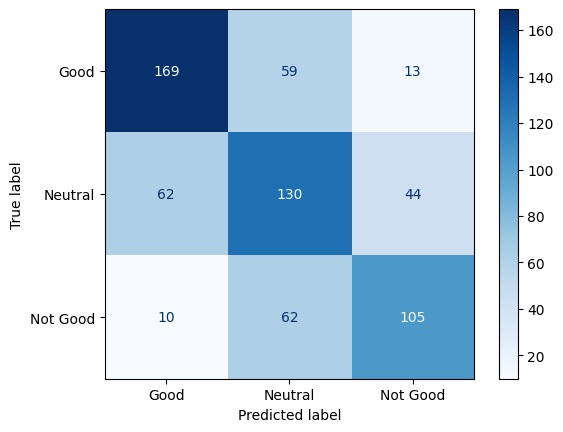

In [ ]:
matriz = confusion_matrix(y_V, y_val_pred, labels=modelo_0.classes_)

# mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=modelo_0.classes_)
disp.plot(cmap="Blues")

###**Optimizar hiperparámetros**

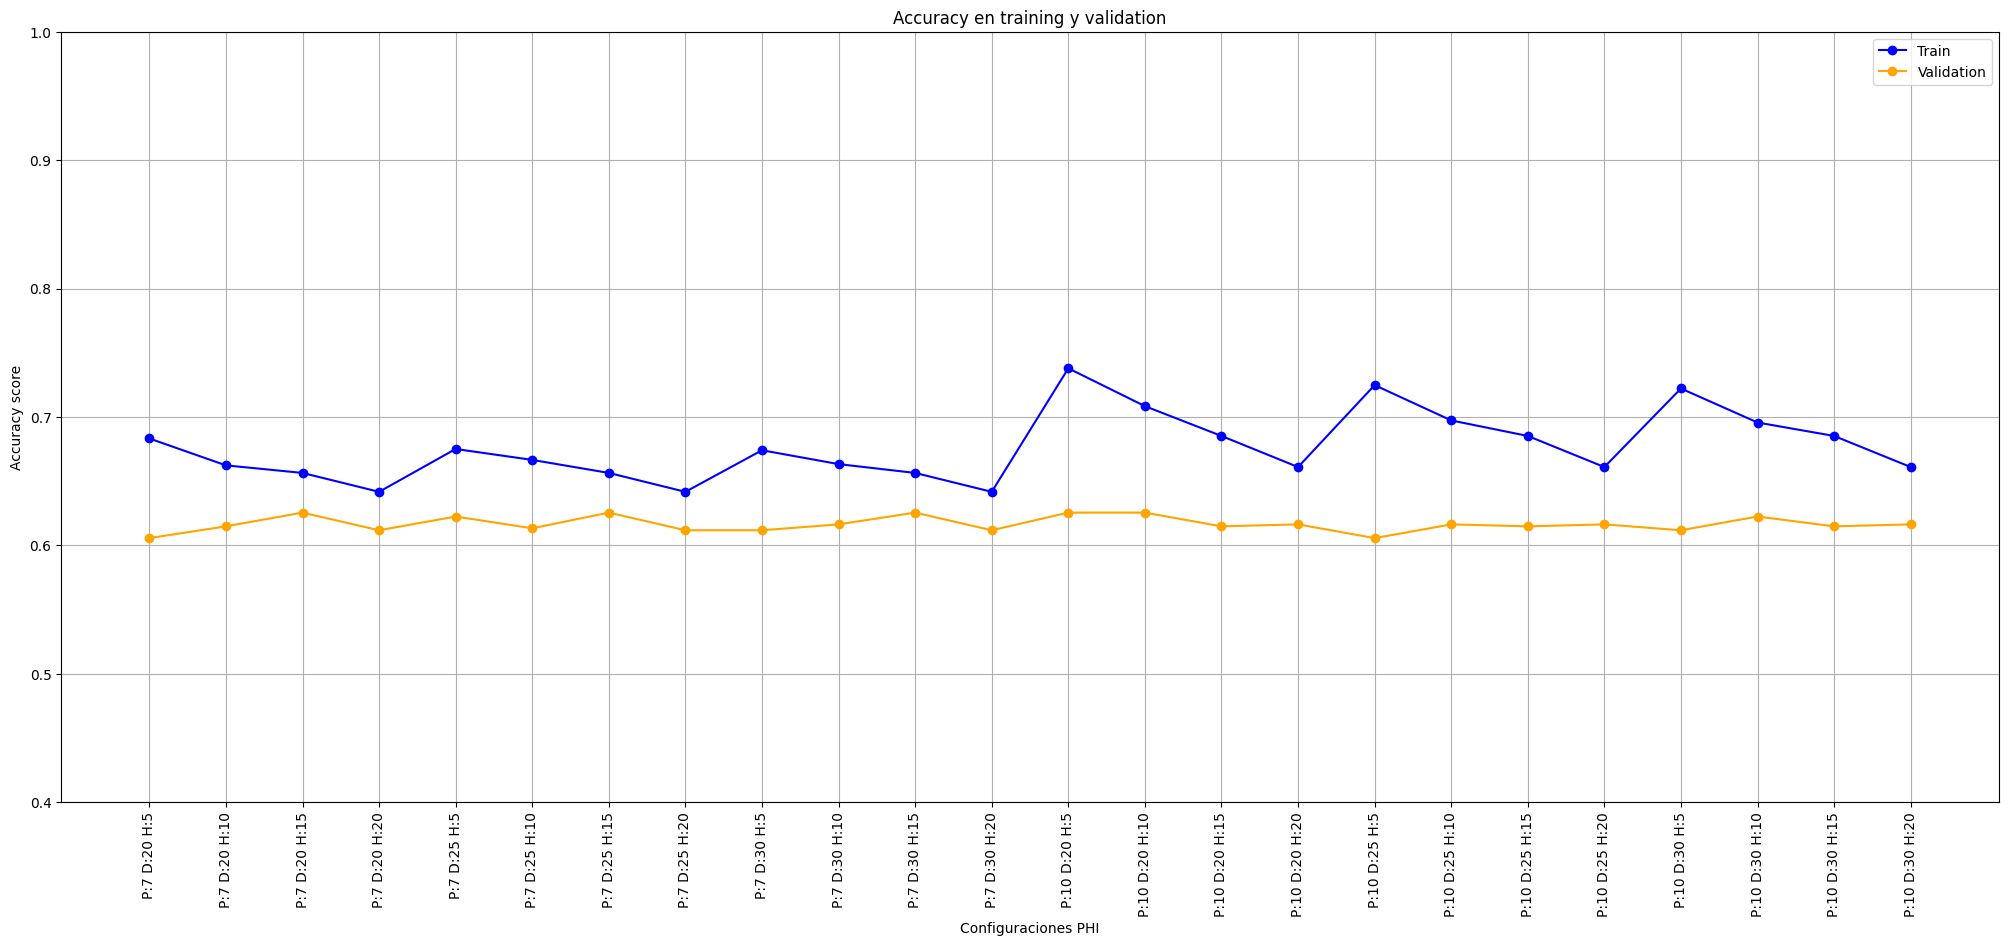

In [ ]:
# Rango de hiperparámetros a probar
PROFUNDIDAD = [7, 10]        # max_depth
OBS_DIVIDIR = [20, 25, 30]      # min_samples_split
OBS_HOJA    =  [5, 10,15 ,20]           # min_samples_leaf

# Construir todas las configuraciones PHI
PHI     = {}
j       = 0
x_ticks = []

for profundidad in PROFUNDIDAD:
    for obs_dividir in OBS_DIVIDIR:
        for obs_hoja in OBS_HOJA:
            PHI[j]  = {"P":profundidad, "D":obs_dividir, "H":obs_hoja}
            x_ticks.append(f"P:{profundidad} D:{obs_dividir} H:{obs_hoja}")
            j += 1

# Guardar resultados
F_DT       = []
accuracy_T = []
accuracy_V = []

# Entrenar y evaluar cada configuración
for (_, PHI_j) in PHI.items():
    # Crear modelo con configuración
    f_dt = RandomForestClassifier(
        max_depth=PHI_j["P"],
        min_samples_split=PHI_j["D"],
        min_samples_leaf=PHI_j["H"],
        max_features="log2",
        random_state=42
    )

    # Entrenar
    f_dt.fit(X_T, y_T)

    # Predicciones
    Y_pred_T = f_dt.predict(X_T)
    Y_pred_V = f_dt.predict(X_V)

    # Accuracy
    acc_T = accuracy_score(y_T, Y_pred_T)
    acc_V = accuracy_score(y_V, Y_pred_V)

    # Guardar
    F_DT.append(f_dt)
    accuracy_T.append(acc_T)
    accuracy_V.append(acc_V)

# Visualización
posicion = len(PHI)
plt.figure(figsize=(25,10))
plt.plot(range(posicion), accuracy_T[:posicion], marker="o", color="blue", label="Train")
plt.plot(range(posicion), accuracy_V[:posicion], marker="o", color="orange", label="Validation")
plt.xticks(ticks=range(posicion), labels=x_ticks[:posicion], rotation=90)
plt.xlabel("Configuraciones PHI")
plt.ylabel("Accuracy score")
plt.title("Accuracy en training y validation")
plt.grid()
plt.ylim(0.4, 1)
plt.legend()
plt.show()

In [ ]:
#P: 7 || D:30 || h:15
X_TV = pd.concat([X_T, X_V], axis = 0)
y_TV = pd.concat([y_T, y_V], axis = 0)

modelo = RandomForestClassifier(
        max_depth=7,
        min_samples_split=30,
        min_samples_leaf=15,
        max_features="log2",
        random_state=42
    )

# Entrenar
modelo.fit(X_TV, y_TV)

# Predicciones
Y_pred_t = f_dt.predict(X_t)

# Accuracy
acc_TV = accuracy_score(y_t, Y_pred_t)
print(round(acc_TV,2))

0.62


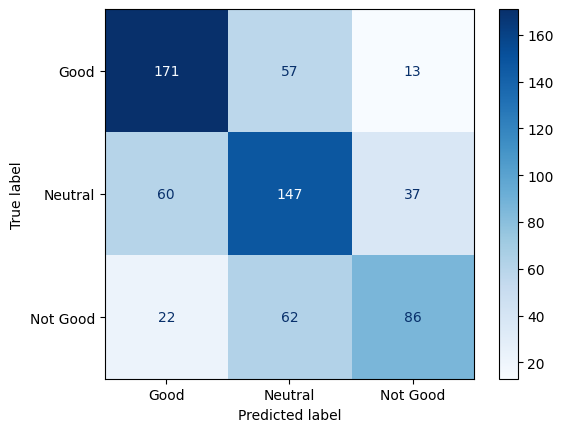

In [ ]:
matriz = confusion_matrix(y_t, Y_pred_t, labels=modelo.classes_)

# mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=modelo.classes_)
disp.plot(cmap="Blues")

In [ ]:
#ver importancia de los features
importancias = modelo.feature_importances_

# Crear dataframe ordenado
feat_importances = pd.DataFrame({
    "feature": X_TV.columns,
    "importance": importancias
}).sort_values(by="importance", ascending=False)

print(feat_importances)

                    feature  importance
40                 duration    0.145272
38     movie_facebook_likes    0.137853
37             ratio_profit    0.132431
39   num_critic_for_reviews    0.114863
7                     Drama    0.082741
36  director_facebook_likes    0.075876
4                    Comedy    0.034881
13                   Horror    0.029806
34          CR_grouped_Teen    0.025959
29  continent_North America    0.022661
0                    Action    0.022040
23                 Thriller    0.019952
32         CR_grouped_Adult    0.015757
3                 Biography    0.015497
28         continent_Europe    0.015294
6               Documentary    0.010342
5                     Crime    0.009698
19                  Romance    0.008931
1                 Adventure    0.008861
35       CR_grouped_Unrated    0.008253
9                   Fantasy    0.008230
20                   Sci-Fi    0.008159
33        CR_grouped_Family    0.007934
8                    Family    0.005770


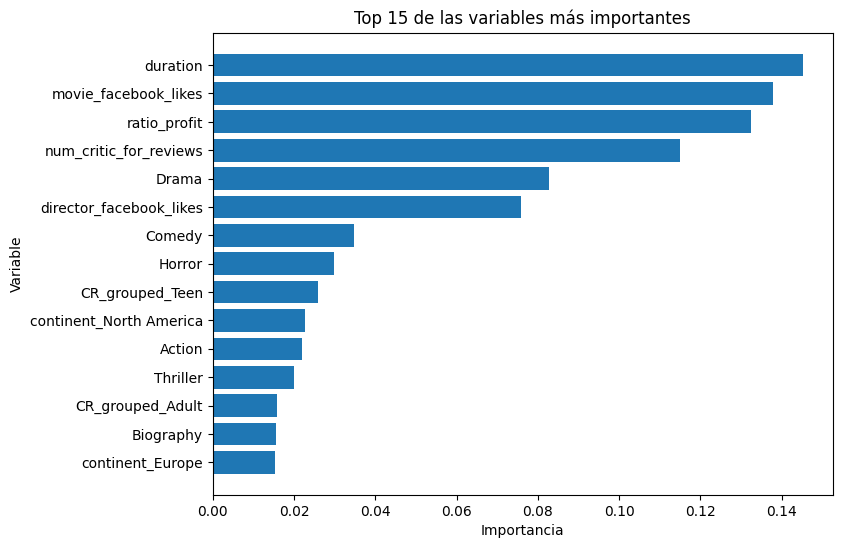

In [ ]:

plt.figure(figsize=(8,6))
plt.barh(feat_importances["feature"][:15][::-1],
         feat_importances["importance"][:15][::-1])
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Top 15 de las variables más importantes")
plt.show()